In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [30]:
df = pd.read_csv("measurements.csv")
df

,Length of Face,Temple to Temple,Cheekbone to Cheekbone,Jawline,Time
0,13.117663,9.737329,7.990457,19.934595,0.415145
1,13.700000,9.693338,8.006238,20.502664,0.443549
2,13.941871,9.877096,8.023471,20.893943,0.466560
3,14.102630,9.677494,8.021394,20.706236,0.480099
4,14.008276,9.655059,7.905325,20.896118,0.507650
...,...,...,...,...,...
428,16.528999,11.634144,9.340029,25.080669,14.631606
429,16.416803,11.634144,9.456643,25.226900,14.663050
430,16.418726,11.628684,9.454175,25.030690,14.697336
431,16.441438,11.634144,9.451772,25.053182,14.743474


In [48]:
reg = LinearRegression()
reg.fit(df.drop('Time', axis='columns'), df[['Time']])

LinearRegression()

In [49]:
reg.coef_

array([[-8.57229229, 10.18995572, -7.91480445,  5.0630452 ]])

In [50]:
reg.intercept_

array([-18.75329966])

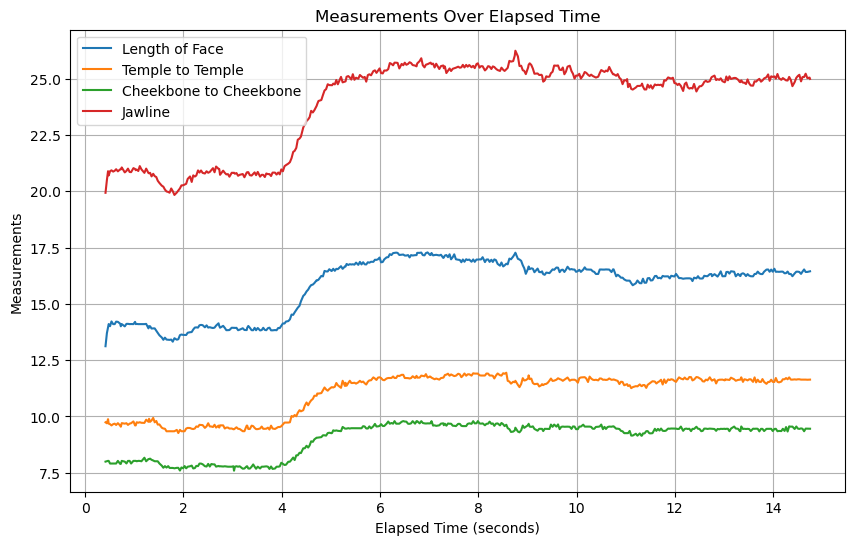

In [54]:
# Create a scatter plot of elapsed time vs. each measurement
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Length of Face'], label='Length of Face')
plt.plot(df['Time'], df['Temple to Temple'], label='Temple to Temple')
plt.plot(df['Time'], df['Cheekbone to Cheekbone'], label='Cheekbone to Cheekbone')
plt.plot(df['Time'], df['Jawline'], label='Jawline')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Measurements')
plt.title('Measurements Over Elapsed Time')
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'Forehead'

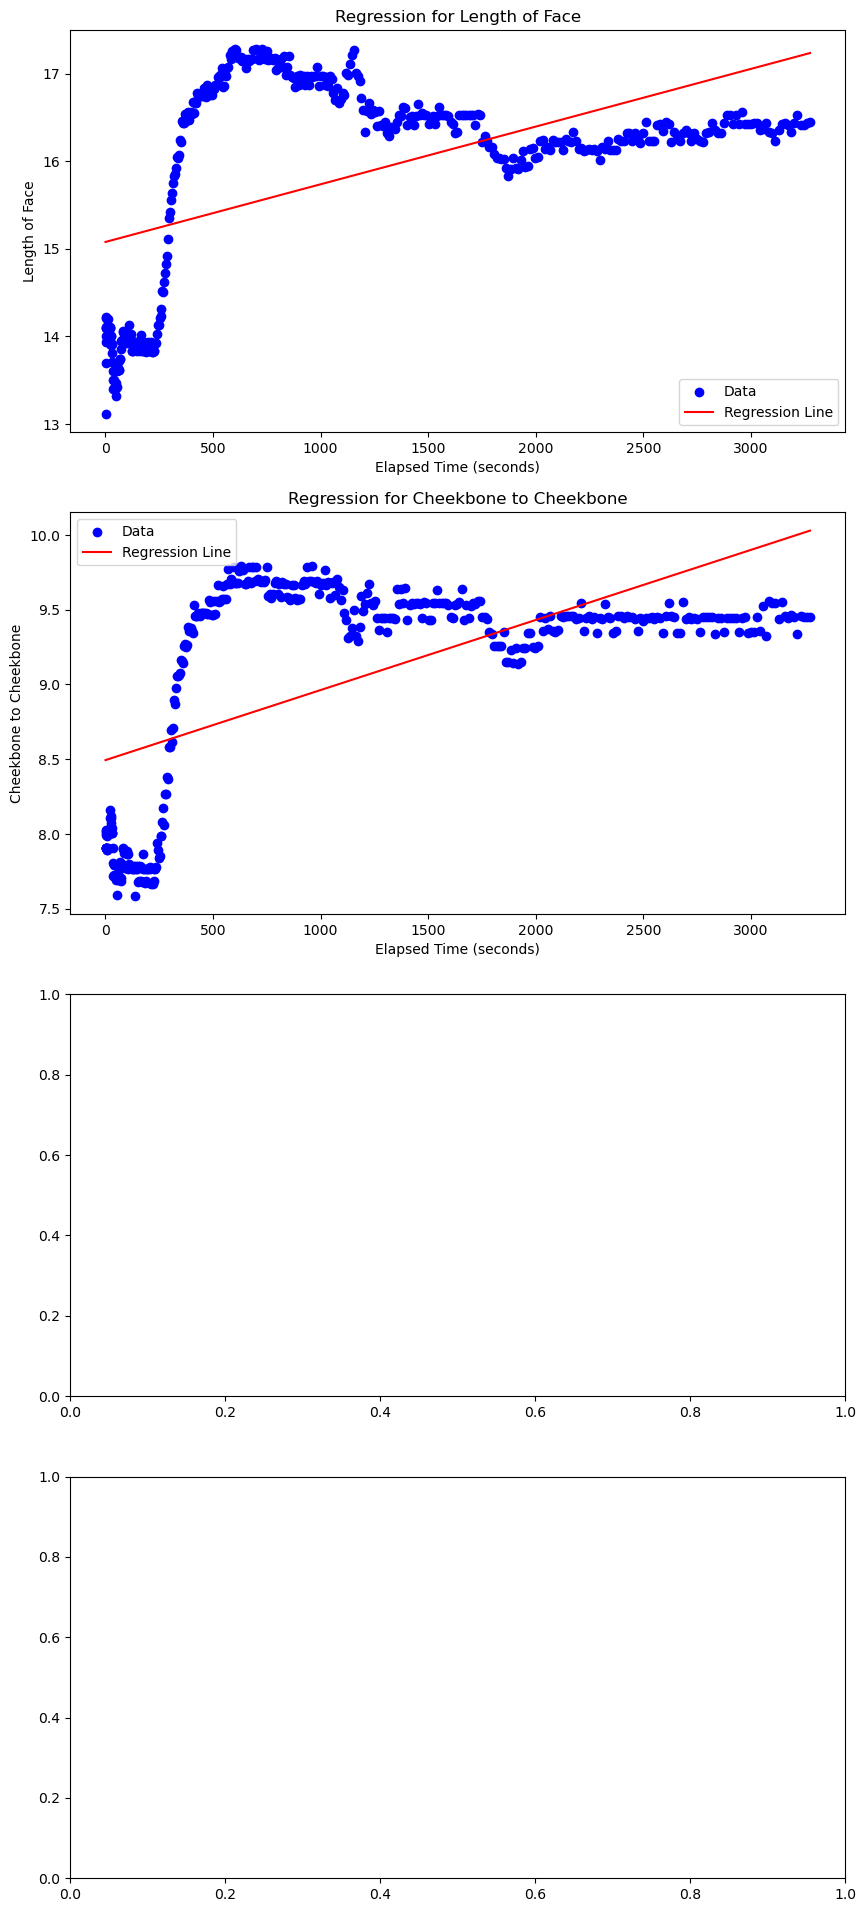

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your DataFrame
df = pd.read_csv("measurements.csv")

# Calculate the elapsed time for each measurement
df['Elapsed Time'] = df['Time'].cumsum()

# List of measurements
measurement_columns = ['Length of Face', 'Cheekbone to Cheekbone', 'Forehead', 'Jawline']

# Create subplots
fig, axs = plt.subplots(len(measurement_columns), figsize=(10, 6 * len(measurement_columns)))

# Perform linear regression and plot for each measurement
for i, measurement in enumerate(measurement_columns):
    # Extract elapsed time and measurement values
    x = df['Elapsed Time'].values.reshape(-1, 1)
    y = df[measurement].values
    
    # Perform linear regression
    reg = LinearRegression()
    reg.fit(x, y)
    
    # Predict values using the regression line
    y_pred = reg.predict(x)
    
    # Plot the original data and the regression line
    axs[i].scatter(x, y, label='Data', color='blue')
    axs[i].plot(x, y_pred, label='Regression Line', color='red')
    axs[i].set_xlabel('Elapsed Time (seconds)')
    axs[i].set_ylabel(measurement)
    axs[i].set_title(f'Regression for {measurement}')
    axs[i].legend()

plt.tight_layout()
plt.show()
